# Assignment 1

### Title : Develop an MNIST hand written digit recognition system using Artificial Neural Network and by Convolutional Neural network.

### Description : MNIST Dataset is a large dataset of handwritten digits containing 60,000 images. The candidate is supposed to develop ANN based and CNN based system for the digit recognition classifer.

### Objective: Familiarity with creating suitable architecture of CNN and compare the classifier results with ANN to prove its validity.

##### Importing Libraries

In [66]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import datasets,layers,models

In [4]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.metrics import confusion_matrix,classification_report

##### Loading Dataset(MNIST)

In [5]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [7]:
X_train.shape

(60000, 28, 28)

##### We have total 60,000 images while size of the image being 28 * 28

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
plt.figure(figsize=(25,5))

<Figure size 1800x360 with 0 Axes>

<Figure size 1800x360 with 0 Axes>

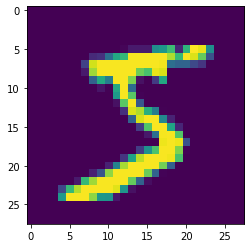

In [10]:
plt.imshow(X_train[0])

##### Here we define a list for labelling the numbers in the dataset from Zero to Nine

In [11]:
classes=["zero","one","two","three","four","five","six","seven","eight","nine"]

##### Function for plotting the image with the label

In [12]:
def plt_show(X,y,index):
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [13]:
y_train = y_train.reshape(-1,)

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
X_train[0] = X_train[0]/255

In [16]:
X_train[0]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 

In [17]:
X_train = X_train/255

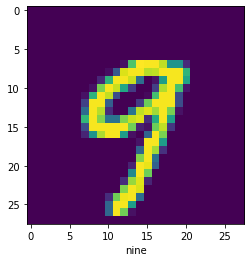

In [18]:
plt_show(X_train,y_train,45)

##### Now we will start creating a ANN model,starting with defining the model.
##### Here we have used 3 hidden layer, a flatten layer for making it linear and an output layer.

In [67]:
ann=models.Sequential([layers.Flatten(input_shape=(28,28)),
                       layers.Dense(5000,activation='relu'),
                       layers.Dense(500,activation='relu'),
                       layers.Dense(100,activation='relu'),
                       layers.Dense(10,activation='sigmoid')])

##### We will compile the model while using SGD as optimizer, sparse categorical crossentropy as loss and accuracy as metrices

In [69]:
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

##### The model is compiled and we will fit the data in the model we just created, 
##### will keep backpropagating until we get a good accuracy.

In [70]:
ann.fit(X_train,y_train,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 103s 40ms/step - loss: 0.7919 - accuracy: 0.8058
Epoch 2/6
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2269 - accuracy: 0.9364
Epoch 3/6
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1652 - accuracy: 0.95150s - loss: 0.1652 - ac
Epoch 4/6
1875/1875 [==============================] - 83s 44ms/step - loss: 0.1280 - accuracy: 0.9640
Epoch 5/6
1875/1875 [==============================] - 87s 46ms/step - loss: 0.1037 - accuracy: 0.9714
Epoch 6/6
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0860 - accuracy: 0.97550s - loss: 0.0


In [71]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 4s 11ms/step - loss: 13.8812 - accuracy: 0.9681


[13.881214141845703, 0.9681000113487244]

##### The overall accuracy we get is 96.81%

In [55]:
y_predict = ann.predict(X_test)

In [56]:
y_predict

array([[0., 0., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [62]:
y_predict_classes=[np.argmax(element) for element in y_predict]

In [63]:
y_test = y_test.reshape(-1,)

In [64]:
print("classification report\n",classification_report(y_test,y_predict_classes))

classification report
               precision    recall  f1-score   support

           0       0.30      1.00      0.46       980
           1       0.44      0.99      0.61      1135
           2       0.14      0.25      0.18      1032
           3       0.09      0.12      0.11      1010
           4       0.74      0.67      0.70       982
           5       0.11      0.00      0.01       892
           6       0.00      0.00      0.00       958
           7       1.00      0.01      0.03      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.32     10000
   macro avg       0.28      0.31      0.21     10000
weighted avg       0.29      0.32      0.22     10000



In [59]:
y_predict_classes

[2,
 0,
 1,
 0,
 4,
 1,
 4,
 3,
 0,
 4,
 0,
 0,
 3,
 0,
 1,
 3,
 4,
 0,
 1,
 4,
 3,
 0,
 4,
 0,
 4,
 0,
 0,
 4,
 0,
 1,
 3,
 1,
 1,
 0,
 2,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 3,
 1,
 1,
 0,
 1,
 1,
 4,
 4,
 0,
 2,
 0,
 3,
 0,
 0,
 4,
 1,
 3,
 0,
 2,
 2,
 4,
 2,
 2,
 3,
 2,
 2,
 3,
 0,
 0,
 0,
 0,
 3,
 1,
 1,
 1,
 1,
 3,
 2,
 4,
 0,
 2,
 3,
 2,
 4,
 2,
 1,
 0,
 1,
 3,
 2,
 4,
 3,
 1,
 4,
 1,
 1,
 0,
 3,
 0,
 0,
 3,
 4,
 3,
 3,
 0,
 0,
 3,
 4,
 1,
 1,
 1,
 3,
 2,
 4,
 4,
 2,
 3,
 2,
 3,
 0,
 2,
 2,
 4,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 3,
 0,
 0,
 0,
 1,
 4,
 0,
 0,
 0,
 1,
 4,
 0,
 0,
 4,
 2,
 3,
 0,
 0,
 1,
 4,
 4,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 3,
 2,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 3,
 0,
 1,
 1,
 0,
 4,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 3,
 0,
 2,
 3,
 4,
 0,
 3,
 1,
 3,
 0,
 2,
 0,
 3,
 0,
 3,
 0,
 0,
 2,
 1,
 0,
 3,
 4,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 3,
 1,
 1,
 4,
 1,
 3,
 0,
 0,
 2,
 1,
 1,
 0,
 2,
 4,
 1,


In [28]:
X_train = np.expand_dims(X_train, axis=-1)

##### CNN model creation, we start with defining the model, creating two Conv2d layer since images are in 2d
##### Next we use MaxPooling here, we also add flatten layer so to convert it into a linear form
##### After this we add fully connected layer.

In [29]:
cnn=models.Sequential([
                       layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
                       layers.MaxPooling2D((2,2)),
                       layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                       layers.MaxPooling2D((2,2)),                    
                       layers.Flatten(),
                       layers.Dense(64,activation='relu'),
                       layers.Dense(10,activation='softmax')])

##### We will compile the model while using SGD as optimizer, sparse categorical crossentropy as loss and accuracy as metrices

In [30]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

##### The model is compiled and we will fit the data in the model we just created, 
##### will keep backpropagating until we get a good accuracy. We have used 5 epochs

In [31]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.3124 - accuracy: 0.9066
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0474 - accuracy: 0.9851
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0332 - accuracy: 0.98931s - ETA: 0s - loss: 0.0332 - ac
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0225 - accuracy: 0.9929
Epoch 5/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0176 - accuracy: 0.9939


In [65]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 7.1624 - accuracy: 0.9887


[7.162412643432617, 0.9886999726295471]

##### The Accuracy we achive with cnn model is 98.87%

In [32]:
y_test=y_test.reshape(-1,)

In [33]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

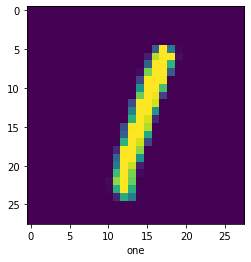

In [38]:
plt_show(X_test,y_test,5)

In [40]:
X_test = np.expand_dims(X_test, axis=-1)

In [42]:
y_predict=cnn.predict(X_test)

In [43]:
y_predict

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [44]:
y_classes=[np.argmax(element) for element in y_predict]

In [45]:
y_classes

[7,
 2,
 1,
 0,
 4,
 1,
 4,
 9,
 5,
 9,
 0,
 6,
 9,
 0,
 1,
 5,
 9,
 7,
 3,
 4,
 9,
 6,
 6,
 5,
 4,
 0,
 7,
 4,
 0,
 1,
 3,
 1,
 3,
 4,
 7,
 2,
 7,
 1,
 2,
 1,
 1,
 7,
 4,
 2,
 3,
 5,
 1,
 2,
 4,
 4,
 6,
 3,
 5,
 5,
 6,
 0,
 4,
 1,
 9,
 5,
 7,
 8,
 9,
 3,
 7,
 4,
 6,
 4,
 3,
 0,
 7,
 0,
 2,
 9,
 1,
 7,
 3,
 2,
 9,
 7,
 7,
 6,
 2,
 7,
 8,
 4,
 7,
 3,
 6,
 1,
 3,
 6,
 9,
 3,
 1,
 4,
 1,
 7,
 6,
 9,
 6,
 0,
 5,
 4,
 9,
 9,
 2,
 1,
 9,
 4,
 8,
 7,
 3,
 9,
 7,
 9,
 4,
 4,
 9,
 2,
 5,
 4,
 7,
 6,
 7,
 9,
 0,
 5,
 8,
 5,
 6,
 6,
 5,
 7,
 8,
 1,
 0,
 1,
 6,
 4,
 6,
 7,
 3,
 1,
 7,
 1,
 8,
 2,
 0,
 2,
 9,
 9,
 5,
 5,
 1,
 5,
 6,
 0,
 3,
 4,
 4,
 6,
 5,
 4,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 7,
 2,
 3,
 2,
 7,
 1,
 8,
 1,
 8,
 1,
 8,
 5,
 0,
 8,
 9,
 2,
 5,
 0,
 1,
 1,
 1,
 0,
 9,
 0,
 3,
 1,
 6,
 4,
 2,
 3,
 6,
 1,
 1,
 1,
 3,
 9,
 5,
 2,
 9,
 4,
 5,
 9,
 3,
 9,
 0,
 3,
 6,
 5,
 5,
 7,
 2,
 2,
 7,
 1,
 2,
 8,
 4,
 1,
 7,
 3,
 3,
 8,
 8,
 7,
 9,
 2,
 2,
 4,
 1,
 5,
 9,
 8,
 7,
 2,
 3,
 0,
 6,
 4,
 2,


In [46]:
print("Classification Report\n",classification_report(y_test,y_classes))

Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Comparing ANN and CNN model the accuracy achieved after backpropagation with ann is 96% and with CNN it goes upto 99%.